Класс слоя батч-нормализации.

In [ ]:
tf.keras.layers.BatchNormalization(
    axis=-1,                                    # Ось, определяющая подтензоры для независимой нормализации
    momentum=0.99,                              # Инерция скользящей средней для тестирования
    epsilon=0.001,                              # Маленькое число для избежания деления на ноль
    center=True,                                # Центрирование батча
    scale=True,                                 # Масштабирование батча
    beta_initializer="zeros",                   # Инициализатор свободного коэффициента
    gamma_initializer="ones",                   # Инициализатор коэффициента масштабирования
    moving_mean_initializer="zeros",            # Инициализатор скользящего среднего
    moving_variance_initializer="ones",         # Инициализатор скользящей дисперсии
    beta_regularizer=None,                      # Регуляризатор свободного коэффициента
    gamma_regularizer=None,                     # Регуляризатор коэффициента масштабирования
    beta_constraint=None,                       # Ограничение на свободный коэффициент
    gamma_constraint=None,                      # Ограничение на коэффициент масштабирования
    **kwargs
)

Слой `tf.keras.layers.BatchNormalization` усредняет все значения входного тензора по батчу.

BatchNormalization применяет преобразование, которое поддерживает среднее значение вывода близким к 0, а стандартное отклонение вывода – к 1.

**Важно: нормализация не происходит единым образом для всех значений входного тензора. Входной тензор разделяется на подтензоры, каждый из которых нормализуется уже отдельно, независимо от остальных.** Подробнее смотреть в параметре `axis`.
<br>
<br>
**Режим обучения** (т.е. при использовании метода слоя/модели `.fit()` или при вызове слоя/модели с аргументом `training = True`) слой/модель нормализует свой вывод, используя среднее значение и стандартное отклонение текущего пакета входных данных. <br>

Для каждого нормализованного подтензора (согласно параметру `axis`) слой возвращает <br> `gamma * (batch - mean(batch)) / sqrt(var(batch) + epsilon) + beta`, где:<br>
• `epsilon` - небольшая константа; <br>
• `gamma` - это коэффициент масштабирования (инициализируется как 1), который можно отключить, передав конструктору `scale = False`; <br>
• `beta` - это коэффициент смещения (инициализируется как 0), который можно отключить, передав конструктору `center = False`; <br>
Здесь `epsilon`, `gamma` и `beta` – параметры сети, настраивывемые во время обучения;<br>
• `batch` - входной подтензор батча, перпендекулярный оси `axis`;<br>
• `mean` - среднее значений;<br>
• `var` - дисперсия значений;<br>
• `sqrt` - квадратный корень;<br>
Здесь `gamma` и `beta` инициализируются отдельно для каждого подтензора, перпендекулярного `axis`.
<br>
<br>
**Режим тестирования**<br>
`gamma * (batch - self.moving_mean) / sqrt(self.moving_var + epsilon) + beta`, где <br>
`self.moving_mean` – скользящее среднее;<br>
`self.moving_var` – скользящая дисперсия;<br>
`self.moving_mean` и `self.moving_var` – необучаемые переменные, которые обновляются каждый раз, когда слой вызывается в режиме обучения.<br>
Обновление этих переменных происходит по формулам:

`self.moving_mean = self.moving_mean * momentum + mean(batch) * (1 - momentum)`,<br>
`self.moving_var = self.moving_var * momentum + var(batch) * (1 - momentum)`.<br>
Здесь `momentum` – задаваемая инерция скользящих.

*Необучаемые переменные – значения, меняющиеся в слое при его использовании в режиме обучения, но не меняющиеся вместе с остальными весами при применении оптимизатора.*

### Теория

#### **Этап обучения**

*Все формулы ниже приведены для одного значения оси `axis`. Эту ось будем называть для простоты изложения каналом* <br>
Матожидание:
$$\mu^{(c)} = \frac{1}{m} \sum_{i=1}^m x_i^{(c)}, где \qquad (1)$$

 $x^{(c)}$ – список всех значений батча в пределах одного значения канала, <br>
$m$ – число этих значений.<br>

Дисперсия:
$$\sigma^{(c)} = \sqrt{\frac{1}{m} \sum_{i=1}^m (x_i^{(c)} - \mu^{(c)})^2} \qquad (2)$$

Нормализация:
$$\hat x_i^{(c)} = \frac{x_i^{(c)} - \mu^{(c)}}{\sqrt{(\sigma^{(c)})^2 + \epsilon}} \qquad (3)$$

Батч-нормализация:
$$y_i^{(c)} = \gamma^{(c)} \hat x_i^{(c)} + \beta^{(c)} \qquad (4)$$

Здесь: <br>
• $\epsilon$ - небольшая константа (настраивается как часть аргументов конструктора). Единое значение для всего слоя. <br>
• $\gamma^{(c)}$ - это коэффициент масштабирования (инициализируется как 1), который можно отключить, передав конструктору `scale = False`. <br>
• $\beta^{(c)}$ - это коэффициент смещения (инициализируется как 0), который можно отключить, передав конструктору `center = False`. <br>

Выход слоя получается объединением $y_i^{(c)}$ по всем каналам так, что на выходе получается тензор того же размера, что и на входе.

Здесь $\gamma^{(c)}$ и $\beta^{(c)}$ – параметры слоя. С точки зрения обучения сети это такие же параметры, как и веса линейного слоя или значения ядра сверточного слоя. <br>
Заметим, что если $\gamma^{(c)} = \sqrt{(\sigma^{(c)})^2 + \epsilon}$ и $\beta^{(c)} = \mu^{(c)}$, то $y_i^{(c)}$ будет равен $x_i^{(c)}$. То есть слой просто осуществит тождественное преобразование по каналу.

Еще существуют некоторые внутренние переменные, которые обновляются на этапе обучения (но используются только при тестировании). Их изменение происходит по итеративным формулам:
$$m_m^{(c)} \leftarrow m_m^{(c)} \cdot p + \mu^{(c)} \cdot (1 - p), \qquad (5)$$
$$m_v^{(c)} \leftarrow m_v^{(c)} \cdot p + (\sigma^{(c)})^2 \cdot (1 - p). \qquad (6)$$

Здесь $m_m^{(c)}$ – скользящее среднее,<br>
$m_v^{(c)}$ – скользящая дисперсия,<br>
$p$ – коэффециент инерции.

#### **Этап тестирования**

На этапе тестирования выход слоя вычисляется по формуле:
$$y_i^{(c)} = \gamma^{(c)} \frac{x_i^{(c)} - m_m^{(c)}}{\sqrt{m_v^{(c)} + \epsilon}} + \beta^{(c)} \qquad (7)$$

То есть все ровно то же самое, только вместо среднего и дисперсии батча их скользящие аналоги, которые не зависят от конкретного батча.

Скользящие переменные на этапе тестирования уже не пересчитываются.


# Параметры




## `axis`

Тип: `int` или `list`.

Значение по умолчанию: `-1`.

Описание: ось, перпендекулярно которой следует нормализовать. `BatchNormalization` нормализует каждый канал оси по отдельности. Стоит выбирать такую ось, вдоль которой подтензоры имеют различное смысловое значение. Например, в 3-цветных изображениях целесообразно нормировать каналы отдельно друг от друга (задавая ось каналов `axis = с`), так как среднее значение, среднее отклонение одного канала может значительно отличаться от тех же значений другого канала. В таком случае нормировка без разделения на каналы может быть менее эффективной, чем с разделением.

Примеры:<br>
• `axis = -1` – подтензоры, перпендекулярные последней оси входного тензора нормируются независимо друг от друга. Например, если речь идет о изображениях после слоя `Conv2D`, то последняя ось – ось каналов.<br>
• `axis = 1` – нормировка по оси 1. Хорошо подходит под случай, когда используются изображения тензорного формата `data_format = 'channels_first'` вместо обычного `data_format = 'channels_last'`.

#### Подробнее о роли `axis` в слое.

Допустим входной тензор `X` – это изображение формы `(32, 5, 5, 3)` (см. рисунок).

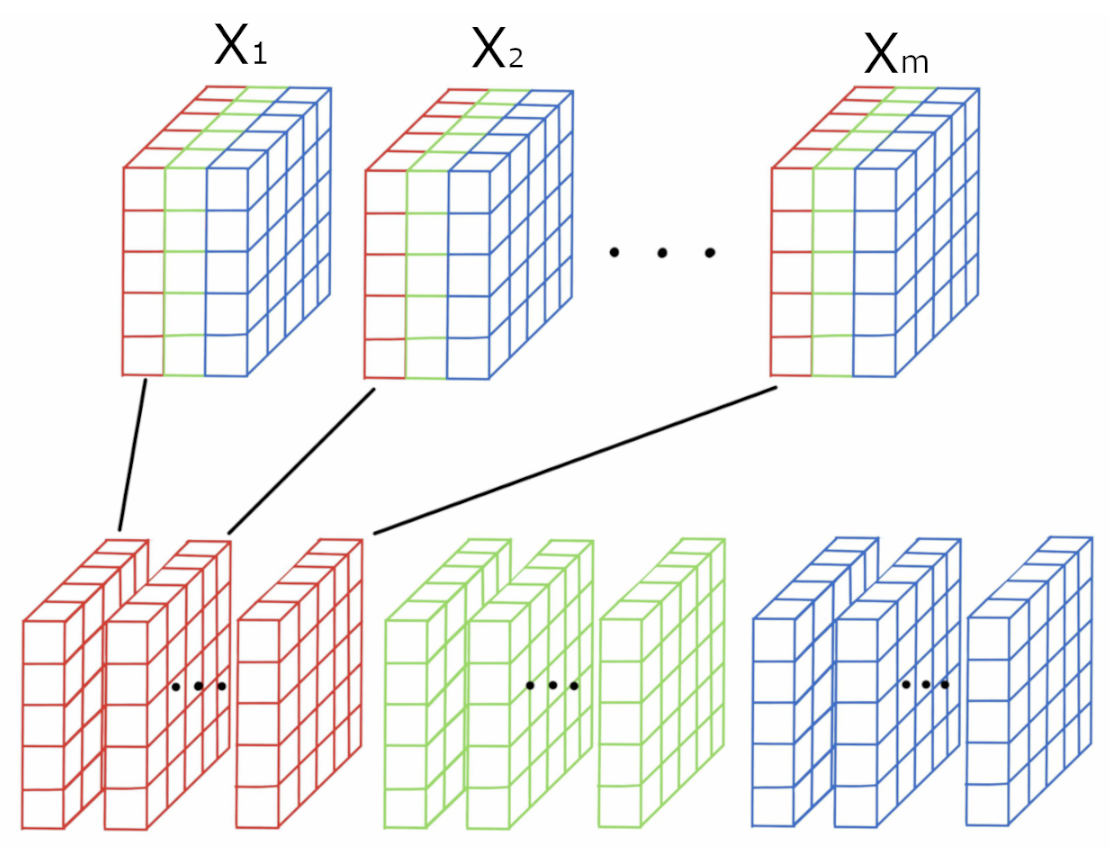

В нем `32` – размер батча (на рисунке `m`), `3` – число каналов, `(5, 5)` – размер изображения. Тогда при `axis = -1` слой `BatchNormalization` создаст 3 набора весов `beta`, `gamma`, `moving_mean` и `moving_var` для подтензоров
`X[:, :, :, 0], X[:, :, :, 1]` и `X[:, :, :, 2]`. Таким образом создается матрица весов
$$
\begin{pmatrix}
\vec{\beta} \\
\vec{\gamma} \\
\vec{m_m} \\
\vec{m_v} \\
\end{pmatrix} =
\begin{pmatrix}
\beta^{(red)} & \beta^{(green)} & \beta^{(blue)} \\
\gamma^{(red)} & \gamma^{(green)} & \gamma^{(blue)} \\
m_m^{(red)} & m_m^{(green)} & m_m^{(blue)} \\
m_v^{(red)} & m_v^{(green)} & m_v^{(blue)} \\
\end{pmatrix}
$$

Так для каждого канала (красный, зеленый и синий) инициализируются веса отдельно. Для каждого такого подтензора происходит расчет по формулам (1)-(4) или (7) в зависимости от режима, после чего все подтензоры объединяются обратно, в выходной тензор той же формы, что и входной. <br>

В разделе "Примеры" есть иллюстрирующий код.

## `momentum`

Тип: `float`.

Значение по умолчанию: `0.99`.

Описание: инерция скользящей средней. Используется в вычислении `moving_mean` и `moving_var` (см. $(5)$ и $(6)$).

## `epsilon`

Тип: `float`.

Значение по умолчанию: `0.001`.

Описание: небольшое число с плавающей запятой. Суммируется с дисперсией, чтобы избежать деления на ноль. Используется в ф. $(3)$ и $(7)$.

## `center`

Тип: `bool`.

Описание: если `True`, то включать параметр `beta`. <br> Если `False`, то `beta` игнорируется (то есть `beta` равно 0, но отсутсвует как вес).

## `scale`

Тип: `bool`.

Описание: если `True`, умножить на `gamma`.<br> Если `False`, то `gamma` не используется. <br>Когда следующий слой является линейным (например, `nn.relu`), это можно отключить, поскольку масштабирование будет выполняться следующим слоем.

## `beta_initializer`, `gamma_initializer`, <br>
## `moving_mean_initializer`, `moving_variance_initializer`


Тип: `string` или функции из `tf.keras.initializers`.

Описание: задание функции распределения случайных весов. <br>
`beta_initializer` – инициализация `beta`. <br>
`gamma_initializer` – инициализация `gamma`.<br>
`moving_mean_initializer` – инициализация `moving_mean`.<br>
`moving_variance_initializer` – инициализация `moving_variance`.<br>

Выбор начальных весов может влиять на процесс обучения.

Примеры:<br>
• `beta_initializer = 'zeros'` – инициализация нулями (по умолчанию);<br>
• `gamma_initializer = 'ones'` – инициализация единицами (по умолчанию);<br>
• `moving_variance_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05)` – нормальное распределение с нулевым средним и дисперсией 0.05; <br>
Список всех доступных инициализаторов: `RandomNormal, RandomUniform, TruncatedNormal, Zeros, Ones, GlorotNormal, GlorotUniform, Identity, Orthogonal, Constant, VarianceScaling`. Также есть возможность кастомизации.


## `beta_regularizer` и `gamma_regularizer`

Тип: `string` или функции из `tf.keras.regularizers`

Описание: регуляризатор позволяет применять штрафы к параметрам слоя во время оптимизации. Эти штрафы суммируются в функции потерь, минимум которой ищется оптимизатором. Всего 3 варианта регуляризатора: $L_1$, $L_2$ и комбинированный.

Примеры:<br>
• `beta_regularizer = 'l1'` – $L_1$-регуляризатор весов отклонения;<br>
• `beta_regularizer = regularizers.l1(l1=0.01)` – аналогичен предыдущему, но с возможностью задавайть коэффециент регуляризации $l_1$;<br>
• `gamma_regularizer = 'l2'` – $L_2$-регуляризатор весов гамма;<br>
• `gamma_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)` – комбинированный регуляризатор параметров гамма;<br>

Также есть возможность кастомизации.

#### Еще пример

Например, если мы задали для параметра `gamma` регуляризацию $l_1$, для параметра `beta` – $l_2$ и среднеквадратичное отклонение $MSE$, то оптимизатор будет минимизировать выражение

$$MSE(y, pred) + \lambda_1 \cdot ||\gamma||^2_1 + \lambda_2 \cdot ||\beta||^2_2$$
Здесь MSE – среднеквадратичная ошибка; <br>
$\gamma$, $\beta$ – веса, для которых задана регуляризация $l_1$ и $l_2$ соответственно; <br>
$\lambda_1, \lambda_2$ – коэффециенты регуляризации (значения в Keras по умолчанию: `0.01`)
; <br>
То есть мы добавляем дополнительные члены для минимизации вместе с функцией ошибки. При такой постановке задачи оптимизатор будет стремиться **минимизировать** не только **ошибку**, но **и веса**. <br>
Еще можно смотреть на регуляризацию как на ограничение размера весов. То есть оптимизатор не позволяет приобретать весам большие значения.

## `beta_constraint` и `gamma_constraint`

Тип: `string` или функции из `tf.keras.constraints`

Описание: непосредственное ограничение весов. Ограничения класса `constraints` похожи на регуляризаторы `regularizers`. Они так же накладывают некоторые рамки на веса. Однако если регуляризаторы влияют на веса неявно (через минимизацию суммы с функцией ошибки), то `constraints` определяет явные ограничения.
Например, `constraints.NonNeg()` ограничивает веса неотрицательностью. То есть $\gamma \geq 0$.

Примеры:<br>
• `gamma_constraint = 'non_neg'` – все веса `gamma` должны быть неотрицательными;<br>
• `gamma_constraint = constraints.NonNeg()` – аналогично предыдущему примеру;<br>
• `beta_constraint = constraints.MaxNorm(max_value=2, axis=0)` – норма `beta` не должна превышать 2;

Список готовых ограничений: `MaxNorm, MinMaxNorm, NonNeg, UnitNorm, RadialConstraint`. Также есть возможность кастомизации.

# Примеры

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Инициализация входного тензора
x = np.ones((5, 2, 3,))

# Инициализация слоя
layer = BatchNormalization(epsilon=1e-8,
                           gamma_initializer='ones', # По умолчанию
                           beta_initializer='zeros', # По умолчанию
                           moving_mean_initializer='zeros', # По умолчанию
                           moving_variance_initializer='ones', # По умолчанию
                           )

# Инициализируем веса
layer(x)

# Вытащим веса
w = np.array(layer.get_weights())

print('Входной тензор:')
print(x)

# Отобразим веса
print('Все веса:\n', str(w))
print('Форма:', w.shape)

Входной тензор:
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]
Все веса:
 [[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]
Форма: (4, 3)


In [ ]:
print('Выход слоя (режим теста):')
print(layer(x)) # training=False

print('Выход слоя (режим тренировки):')
print(layer(x, training=True))

Выход слоя (режим теста):
tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]], shape=(5, 2, 3), dtype=float32)
Выход слоя (режим тренировки):
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]], shape=(5, 2, 3), dtype=float32)


Внутренние параметры `moving_mean` и `moving_variance` меняются при каждом вызове в режиме тренировки. Поэтому меняется выход сети в режиме теста:

In [ ]:
print('Выход слоя (режим теста):')
print(layer(x)) # training=False

Выход слоя (режим теста):
tf.Tensor(
[[[0.9949874 0.9949874 0.9949874]
  [0.9949874 0.9949874 0.9949874]]

 [[0.9949874 0.9949874 0.9949874]
  [0.9949874 0.9949874 0.9949874]]

 [[0.9949874 0.9949874 0.9949874]
  [0.9949874 0.9949874 0.9949874]]

 [[0.9949874 0.9949874 0.9949874]
  [0.9949874 0.9949874 0.9949874]]

 [[0.9949874 0.9949874 0.9949874]
  [0.9949874 0.9949874 0.9949874]]], shape=(5, 2, 3), dtype=float32)


#### Почему форма матрицы весов: `(4, 3)`?


В форме матрицы весов первое измерение всегда равно `4`, так как у слоя всего 4 типа параметров (кроме тех случаев, когда мы выкидываем какой-либо из них, например при `scale=False`). Второе измерение – `3` – это размер пространства по оси `axis`. У каждого тензора это, конечно, свое число. По умолчанию (`axis = -1`) нормализация происходит перпендекулярно последней оси.
То есть, если представить, что тензор x – изображение, а его последняя ось соответствует каналам, то слой батч-нормализации нормализует каждый канал независимо друг от друга.

In [ ]:
print('\nПараметры:')
print('w[0] =', w[0], '- gamma')
print('w[1] =', w[1], '- beta')
print('w[2] =', w[2], '- moving_mean')
print('w[3] =', w[3], '- moving_variance')


Параметры:
w[0] = [1. 1. 1.] - gamma
w[1] = [0. 0. 0.] - beta
w[2] = [0. 0. 0.] - moving_mean
w[3] = [1. 1. 1.] - moving_variance


Вы можете проверить, какой индекс в матрице весов соотвествует какому параметру, например, с помощью инициализаторов, задавая интересующему параметру значение `ones`, а на остальным – `zeros`.

Если нам нужна другая ось для нормализации, можно просто задать ее в `axis`.

#### Что если изменить конкретные веса?

Поменяем значение веса `beta` на канале с индексом `1` на `10`.

In [ ]:
new_w = w.copy()

# Изменение значения beta, соответствующего каналу 1
new_w[1][1] = 10

# Устанавка новых весов
layer.set_weights(new_w)

# Проверка результата
new_w = np.array(layer.get_weights())

print('Новые веса:')
print(new_w)

print('Выход слоя:')
print(layer(x, training=True))

Новые веса:
[[ 1.  1.  1.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
Выход слоя:
tf.Tensor(
[[[ 0. 10.  0.]
  [ 0. 10.  0.]]

 [[ 0. 10.  0.]
  [ 0. 10.  0.]]

 [[ 0. 10.  0.]
  [ 0. 10.  0.]]

 [[ 0. 10.  0.]
  [ 0. 10.  0.]]

 [[ 0. 10.  0.]
  [ 0. 10.  0.]]], shape=(5, 2, 3), dtype=float32)


Так как значение `beta` прибавляется в самой последней формуле при вычеслении выхода слоя, то все значения канала `1` меняются на `10`.

#### Эпсилон

In [ ]:
# epsilon не является весом, поэтому хранится отдельно
print('epsilon:', layer.epsilon)

epsilon: 1e-08
